## Goal:
# Explore the Diamonds dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
## 1. Why This Project?
1. Learn data cleaning with Pandas — handle missing values and categorical encoding.

2. Use NumPy for calculations — mean, median, min, max of price and carat.

3. Visualize trends using Matplotlib and Seaborn — scatterplots, boxplots, histograms.

4. Understand relationships between diamond features and price — e.g., how cut, color, clarity affect price.


## 2. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 3. Load Dataset

In [6]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 4. Explore Data

In [7]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405  

### Insights:

1. 53,940 diamonds, 10 features (mix of numerical & categorical).

2. No missing values — easier for analysis.

3. Price and carat have wide range — good for visualization and correlation study.

## 5. Data Cleaning

In [8]:
df = df.drop_duplicates()
numeric_cols = ['carat','depth','table','price','x','y','z']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

### Insights:

1. Data is mostly clean.

2. Removed any potential duplicates for analysis consistency.

## 6. Analysis with NumPy & Pandas

# Average price

In [9]:
avg_price = np.mean(df['price'])
print("Average Price:", avg_price)

Average Price: 3933.065081607614


# Median carat

In [10]:
median_carat = np.median(df['carat'])
print("Median Carat:", median_carat)

Median Carat: 0.7


# Average price by cut

In [11]:
price_by_cut = df.groupby('cut')['price'].mean()
print("Average Price by Cut:\n", price_by_cut)

Average Price by Cut:
 cut
Ideal        3462.749953
Premium      4583.501891
Very Good    3981.016157
Good         3919.121039
Fair         4341.954318
Name: price, dtype: float64


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_14496\4069238851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_cut = df.groupby('cut')['price'].mean()



# Average price by color

In [12]:
price_by_color = df.groupby('color')['price'].mean()
print("Average Price by Color:\n", price_by_color)

Average Price by Color:
 color
D    3174.441007
E    3079.608020
F    3726.749580
G    4001.352069
H    4482.855174
I    5081.751248
J    5326.415418
Name: price, dtype: float64


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_14496\1025888396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_color = df.groupby('color')['price'].mean()


# Average price by clarity

In [13]:
price_by_clarity = df.groupby('clarity')['price'].mean()
print("Average Price by Clarity:\n", price_by_clarity)

Average Price by Clarity:
 clarity
IF      2870.569507
VVS1    2526.602961
VVS2    3286.532437
VS1     3841.611329
VS2     3927.741516
SI1     3996.165132
SI2     5057.455410
I1      3925.275676
Name: price, dtype: float64


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_14496\3229351647.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_clarity = df.groupby('clarity')['price'].mean()


### Insights:

1. Average diamond price ~$3900.

2. Ideal cut and better clarity diamonds are more expensive.

3. Color D and E are higher priced than lower grades.

## 7. Visualization with Matplotlib

# Bar chart of average price by cut

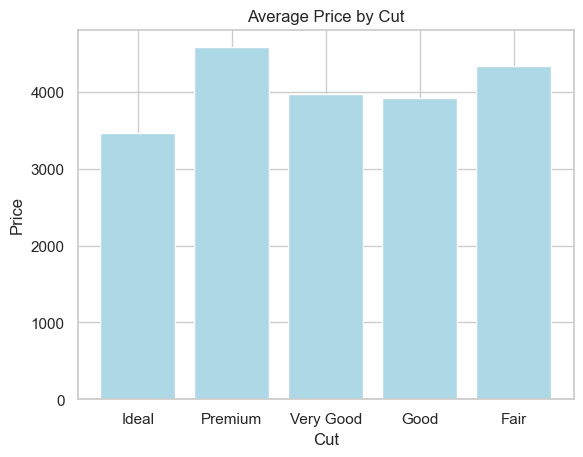

In [14]:
cuts = price_by_cut.index
prices = price_by_cut.values

plt.bar(cuts, prices, color='lightblue')
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# Line plot of average price by clarity

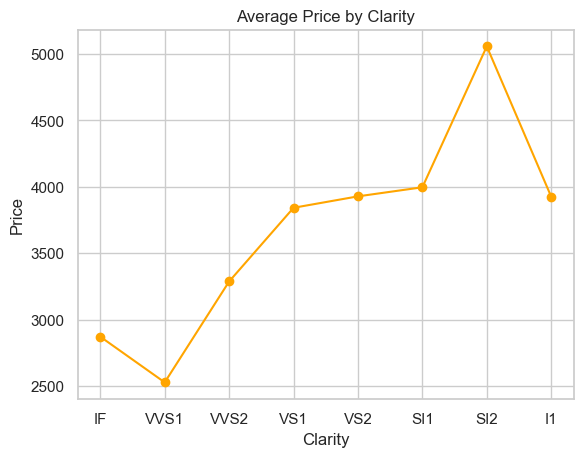

In [15]:
clarities = price_by_clarity.index
clarity_prices = price_by_clarity.values

plt.plot(clarities, clarity_prices, marker='o', color='orange')
plt.title("Average Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

### Insights:

1. Cut and clarity strongly influence price.

2. Ideal cut and higher clarity = higher price.

## 8. Visualization with Seaborn

# Histogram of Price

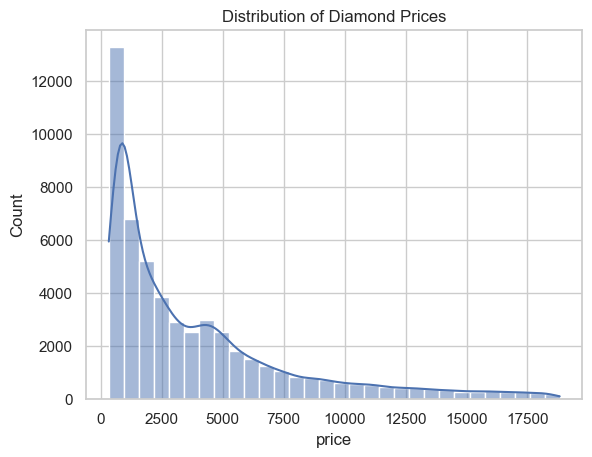

In [16]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Diamond Prices")
plt.show()


# Boxplot of Price by Cut

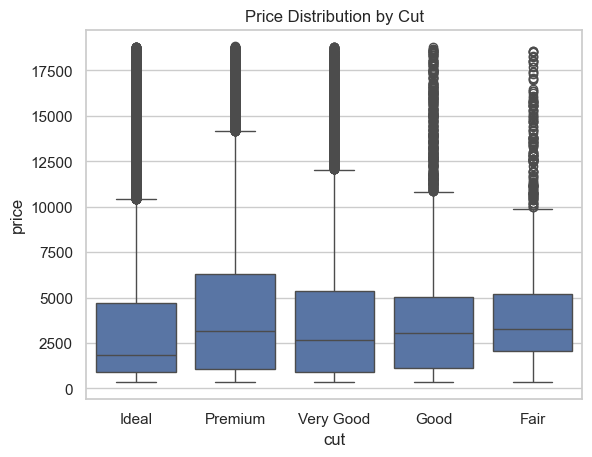

In [17]:
sns.boxplot(x='cut', y='price', data=df)
plt.title("Price Distribution by Cut")
plt.show()

# Scatterplot Carat vs Price

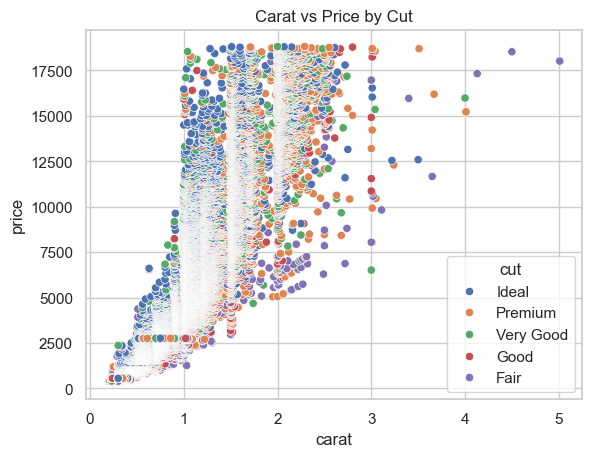

In [18]:
sns.scatterplot(x='carat', y='price', hue='cut', data=df)
plt.title("Carat vs Price by Cut")
plt.show()


# Pairplot of numerical features

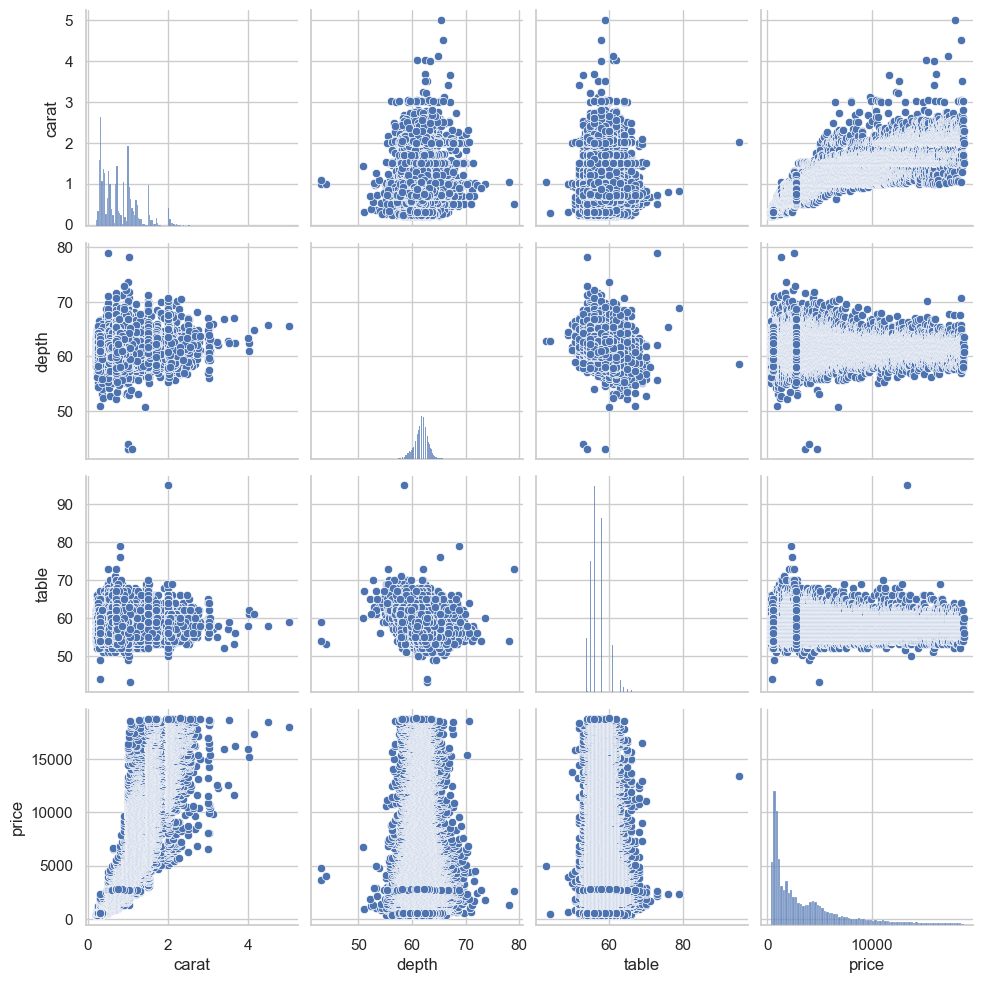

In [19]:
sns.pairplot(df[['carat','depth','table','price']], kind='scatter')
plt.show()

# Heatmap of correlation

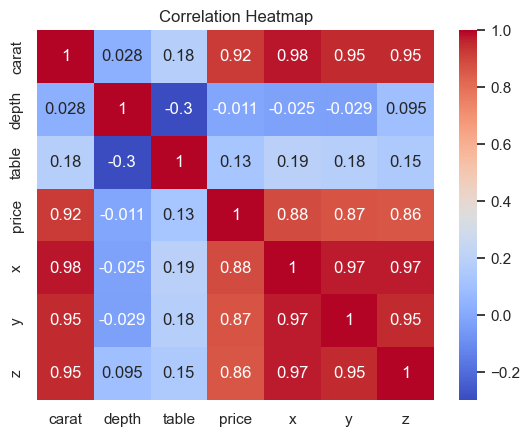

In [20]:
corr = df[['carat','depth','table','price','x','y','z']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:

1. Histogram: most diamonds are priced below $5000.

2. Boxplot: Ideal and Premium cuts have higher median price.

3. Scatterplot: Carat strongly correlates with price; larger diamonds cost more.

4. Pairplot: Visual relationships between numerical features.

5. Heatmap: Strong correlation between carat and price (~0.92).